# **Airbnb Prices in European Cities**

## *Overview*

This dataset contains \~51700 Airbnb listing records from 10 major European cities, provided as 20 CSV files (each city split into weekday and weekend data). **We will use weekend and weekday data for four of these cities (8 csv files).** Each observation includes about 20 variables describing the listing – covering pricing, room characteristics, capacity, host status, cleanliness and satisfaction ratings, and location (distances and coordinates). The data were originally collected for a published study on Airbnb price determinants (Gyódi & Nawaro, 2021) and later released under CC BY 4.0; the dataset’s owner requests citing the original source (Zenodo dataset DOI: 10.5281/zenodo.4446043). **Focus specifically on these four variables: `realSu`, `room_type`, `host_is_superhost`, `dist`**

## **Dataset Structure**

Variable | Description | Type |
| --- | --- | --- |
| **`id`** | Listing Identifier(index) | **Numerical** |
| **`realSum`** | Total Listing Price **(in EUR)** | **Numerical** |
| **`room_type`** | Type of Room *(Entire home/ Private/ Shared)* | **Categorical** |
| **`room_shared`** | Whether the Room Shared | **Boolean** |
| **`room_private`** | Whether the Room Private | **Boolean** |
| **`person_capacity`** | Max Number of Guests Accommodated | **Numerical** |
| **`host_is_superhost`** | Whether Superhost | **Boolean** |
| **`multi`** | Listing Offers Multiple Rooms or Units | **Boolean** |
| **`biz`** | Has Facilities Suitable For Business Stay | **Boolean** |
| **`cleanliness_rating`** | Cleanliness Rating *(1-10, guest-reported)* | **Numerical** |
| **`guest_satisfaction`** | Overall Guest Satisfaction rating *(1–10, guest-reported)* | **Numerical** |
| **`bedrooms`** | Number of Bedrooms *(0 indicates studio)* | **Numerical** |
| **`dist`** | Distance to City Center **(km)** | **Numerical** |
| **`metro_dist`** | Distance to Nearest Metro Station **(km)** | **Numerical** |
| **`attr_index`** | Attraction Index *(proximity to tourist sites)*| **Numerical** |
| **`attr_index_norm`** | Attraction index *(0–100)* | **Numerical** |
| **`rest_index`** | Restaurant Index *(proximity to dining options)* | **Numerical** |
| **`rest_index_norm`** | Restaurant Index *(0–100)* | **Numerical** |
| **`lng`** | Longitude Coordinate of Listing | **Numerical** |
| **`lat`** | Latitude Coordinate of Listing | **Numerical** |

**Source**: Airbnb Prices in European Cities (Kaggle, user: TheDevastator)

## *Question*

We aim to explore how Airbnb listing prices in European cities*(Rome, Budapest, and London )*. Specifically, we want to determine the extent to which location-related factors (`dis`), listing characteristics (`room_type`), and host status (`host_is_superhost`) affect the total listing price (`realSum`). Since our primary goal is to build a predictive model for listing prices based on these factors.

And our question will focuses on prediction. We want to use these relationships between the price and other variable to predict expected prices for different types of listings based on their characteristics and location.

**The response variable is `realSum`(Numerical), and dependent variable are `dis`(Numerical), `room_type`(Categorical), `host_is_superhost`(Boolean)**

In [14]:
library(dplyr)
library(ggplot2)
library(broom)

In [15]:
# Define the path of file and city name and whether weekends
file_info <- list(
    list("/home/jovyan/work/project/rome_weekends.csv", "Rome", TRUE),
    list("/home/jovyan/work/project/rome_weekdays.csv", "Rome", FALSE),
    
    list("/home/jovyan/work/project/budapest_weekends.csv", "Budapest", TRUE),
    list("/home/jovyan/work/project/budapest_weekdays.csv", "Budapest", FALSE),
    
    list("/home/jovyan/work/project/london_weekends.csv", "London", TRUE),
    list("/home/jovyan/work/project/london_weekdays.csv", "London", FALSE)
    
    # list("/home/jovyan/work/project/berlin_weekends.csv", "Berlin", TRUE),
    # list("/home/jovyan/work/project/berlin_weekdays.csv", "Berlin", FALSE)
)

# Make function read the each file
read_airbnb_data <- function(file_info_entry) {
    file <- file_info_entry[[1]]
    city <- file_info_entry[[2]]
    is_weekend <- file_info_entry[[3]]

    df <- read.csv(file, stringsAsFactors = FALSE)
    df$city <- city # Add city column
    df$weekend <- ifelse(is_weekend, 'weekend', 'weekday')
    return(df)
}

data <- lapply(file_info, read_airbnb_data) # Apply function to each file return list of data frame
combined_df <- bind_rows(data) # make data frame

# factor the variable
combined_df$city <- as.factor(combined_df$city)
combined_df$weekend <- as.factor(combined_df$weekend)
combined_df$room_type <- as.factor(combined_df$room_type)
combined_df$host_is_superhost <- as.factor(combined_df$host_is_superhost)

str(combined_df)

'data.frame':	23042 obs. of  22 variables:
 $ X                         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ realSum                   : num  173 157 196 299 131 ...
 $ room_type                 : Factor w/ 3 levels "Entire home/apt",..: 2 2 2 1 2 1 1 2 1 1 ...
 $ room_shared               : chr  "False" "False" "False" "False" ...
 $ room_private              : chr  "True" "True" "True" "False" ...
 $ person_capacity           : num  2 2 2 4 3 6 4 2 4 3 ...
 $ host_is_superhost         : Factor w/ 2 levels "False","True": 1 2 1 1 1 1 1 1 1 1 ...
 $ multi                     : int  0 1 1 0 1 1 1 0 0 0 ...
 $ biz                       : int  0 0 0 1 0 0 0 1 1 0 ...
 $ cleanliness_rating        : num  10 10 9 9 9 9 9 9 10 9 ...
 $ guest_satisfaction_overall: num  93 95 80 90 91 90 89 90 94 92 ...
 $ bedrooms                  : int  1 1 1 1 1 2 2 1 1 1 ...
 $ dist                      : num  1.223 2.978 0.935 2.203 1.296 ...
 $ metro_dist                : num  0.398 1.596 0.649 0.495 0.867 .

In [16]:
# Check for missing values
missing_summary <- sapply(combined_df, function(x) sum(is.na(x)))
print(missing_summary)

                         X                    realSum 
                         0                          0 
                 room_type                room_shared 
                         0                          0 
              room_private            person_capacity 
                         0                          0 
         host_is_superhost                      multi 
                         0                          0 
                       biz         cleanliness_rating 
                         0                          0 
guest_satisfaction_overall                   bedrooms 
                         0                          0 
                      dist                 metro_dist 
                         0                          0 
                attr_index            attr_index_norm 
                         0                          0 
                rest_index            rest_index_norm 
                         0                          0 
          

In [17]:
# Display summary of the combined dataset
print(summary(combined_df))

       X           realSum                   room_type     room_shared       
 Min.   :   0   Min.   :   34.78   Entire home/apt:13534   Length:23042      
 1st Qu.: 960   1st Qu.:  144.05   Private room   : 9432   Class :character  
 Median :1920   Median :  195.92   Shared room    :   76   Mode  :character  
 Mean   :2149   Mean   :  268.47                                             
 3rd Qu.:3314   3rd Qu.:  296.57                                             
 Max.   :5378   Max.   :15499.89                                             
 room_private       person_capacity host_is_superhost     multi       
 Length:23042       Min.   :2.000   False:16996       Min.   :0.0000  
 Class :character   1st Qu.:2.000   True : 6046       1st Qu.:0.0000  
 Mode  :character   Median :3.000                     Median :0.0000  
                    Mean   :3.168                     Mean   :0.3234  
                    3rd Qu.:4.000                     3rd Qu.:1.0000  
                    Max.   :

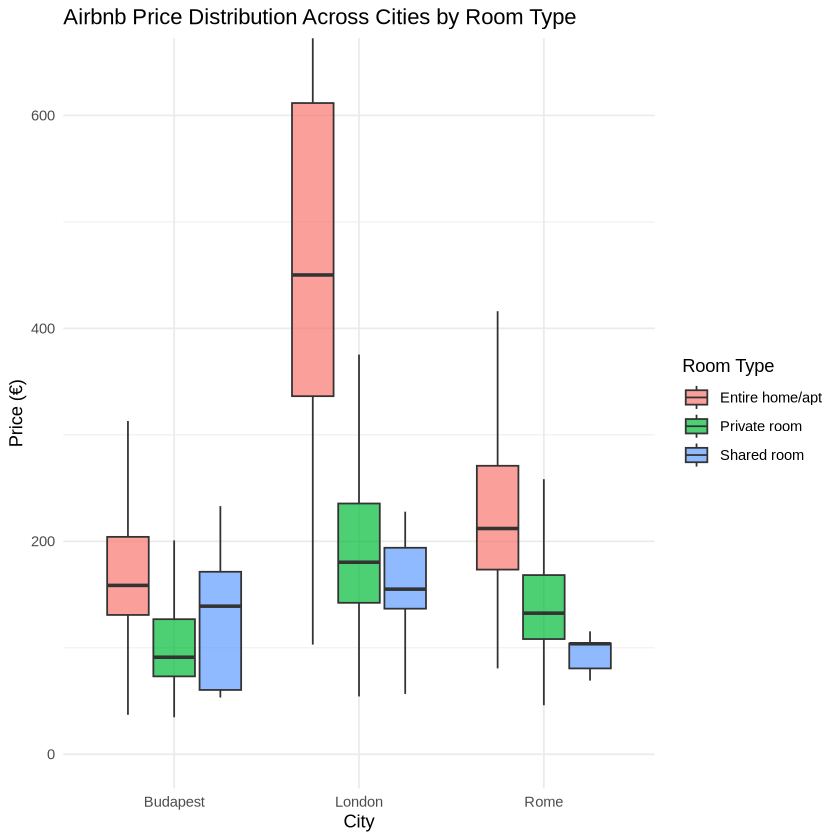

In [18]:
# plot
ggplot(combined_df, aes(x = city, y = realSum, fill = room_type)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) +
  coord_cartesian(ylim = c(0, quantile(combined_df$realSum, 0.95, na.rm = TRUE))) + # Trim outliers
  theme_minimal() +
  labs(title = "Airbnb Price Distribution Across Cities by Room Type",
       x = "City",
       y = "Price (€)",
       fill = "Room Type")

**Helps compare pricing across cities and room types.**
- *London* has the highest price range, especially for entire home/apartments
- It have a wide spread and a much higher median price than other room types and cities
- *Budapest* shows a more compact distribution
- The prices are generally lower, with less variation
- The private rooms are significantly cheaper
- *Rome* shows a clear difference between room types, especially between entire homes and shared rooms
- Room type clearly affects pricing
- Entire homes are consistently more expensive than private or shared rooms in all cities, because their median price higher then other room type

Warning message:
“Removed 1152 rows containing non-finite outside the scale range
(`stat_density()`).”


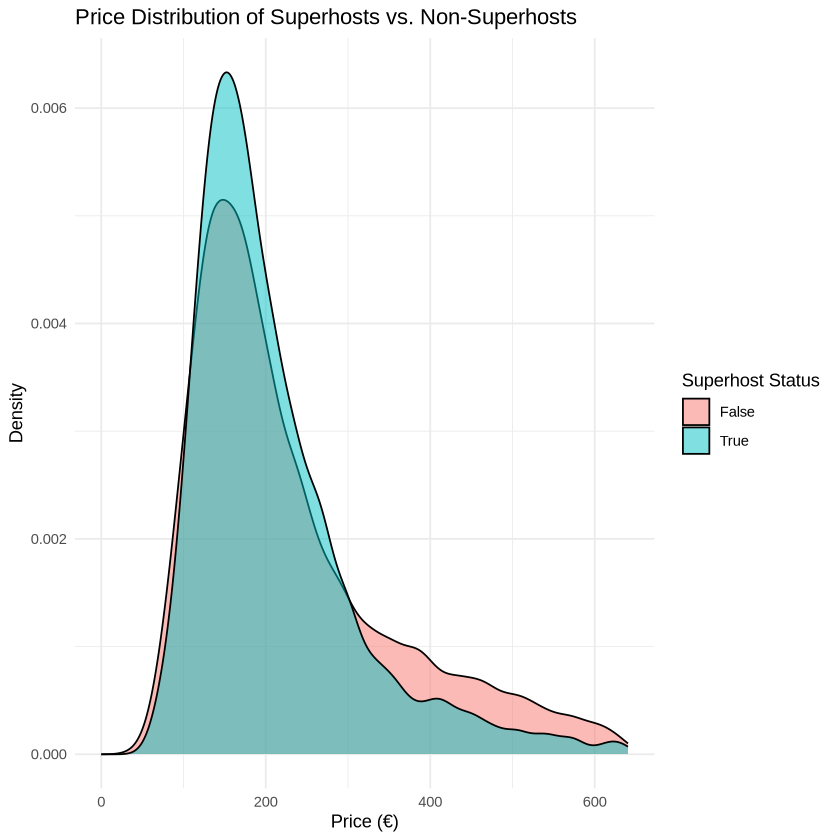

In [19]:
ggplot(combined_df, aes(x = realSum, fill = host_is_superhost)) +
  geom_density(alpha = 0.5) +
  xlim(0, quantile(combined_df$realSum, 0.95, na.rm = TRUE)) +
  theme_minimal() +
  labs(title = "Price Distribution of Superhosts vs. Non-Superhosts",
       x = "Price (€)",
       y = "Density",
       fill = "Superhost Status")

**See if superhosts tend to charge more.**
- Both groups are right-skewed
- Most airbnb listings both superhosts and non-superhosts are clustered under €200
- The blue curve (*superhosts*) peaks slightly after the pink curve (*non-superhosts*)
- This may suggests that superhosts more expensive properties on average
- At prices above €300, the pink area starts to dominate
- This may shows that non-superhosts have more house above €300

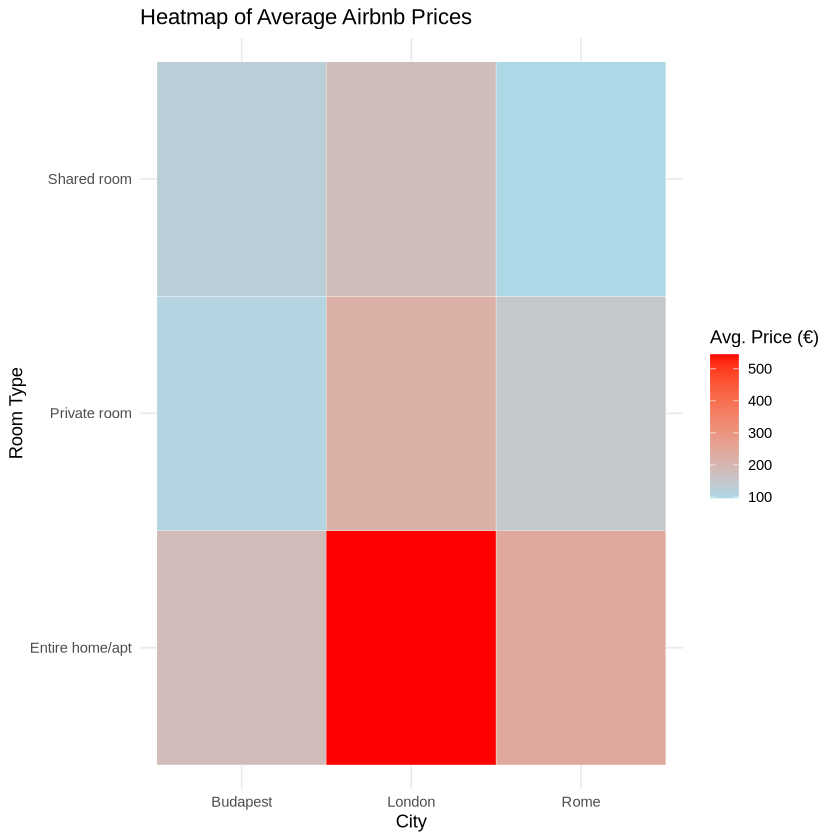

In [20]:
agg_data <- combined_df %>%
  group_by(city, room_type) %>%
  summarise(avg_price = mean(realSum, na.rm = TRUE), .groups = "drop")

ggplot(agg_data, aes(x = city, y = room_type, fill = avg_price)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "lightblue", high = "red") +
  theme_minimal() +
  labs(title = "Heatmap of Average Airbnb Prices",
       x = "City",
       y = "Room Type",
       fill = "Avg. Price (€)")

**Show which cities and room types are most expensive**
- London Entire Homes are the most expensive
    - The darkest red tile indicates highest average prices
- Shared rooms are the cheapest across all cities
    - All shared room tiles are light blue
- Rome is less expensive than London, but pricier than Budapest
- Budapest is generally the most affordable city
- All room types are on the cooler end of the color scale

## *Methods and Plan*

- **Methods:** Multiple Linear Regression
- We want to use a multiple linear regression model to estimate Airbnb listing prices based on location, listing characteristics, and host status.
- We think this method is appropriate because our response variable (`realSum`) is continuous, right-skewed, and may influenced by multiple covariates.
- We will use `log(price)`
- It handles continuous response variables
- It allows us to estimate associations between predictors and listing price
- And this model is interpretable and widely used in similar real-estate price prediction contexts
- **Required assumptions:**
    - The relationship between predictors and the log-transformed price is linear
    - Observations are independent
    - The variance of residuals is constant
    - Residuals are approximately normally distributed
- **Potential limitations:**
    - If the price data is heavily skewed or has outliers, model estimates may be biased
    - The linear form may not capture complex interactions
    - May have other variabl can effect the price and make our predictions not very accurat

## *Computational Code and Output*

In [21]:
# Remove zero or negative prices
combined_df <- combined_df %>% 
    filter(realSum > 0)
combined_df$log_price <- log(combined_df$realSum)

model <- lm(log_price ~ dist + room_type + host_is_superhost + city + weekend, data = combined_df)

summary(model)


Call:
lm(formula = log_price ~ dist + room_type + host_is_superhost + 
    city + weekend, data = combined_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3194 -0.2660 -0.0559  0.2085  4.1518 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)            5.241133   0.007540  695.117  < 2e-16 ***
dist                  -0.066168   0.001206  -54.873  < 2e-16 ***
room_typePrivate room -0.656981   0.005729 -114.681  < 2e-16 ***
room_typeShared room  -0.746826   0.046151  -16.182  < 2e-16 ***
host_is_superhostTrue  0.010895   0.006141    1.774    0.076 .  
cityLondon             1.100074   0.008921  123.308  < 2e-16 ***
cityRome               0.412574   0.007858   52.503  < 2e-16 ***
weekendweekend         0.032939   0.005285    6.232 4.67e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4005 on 23034 degrees of freedom
Multiple R-squared:  0.5319,	Adjusted R-squared:  0.5317 
F-statis

In [22]:
coef_table <- tidy(model, conf.int = TRUE)
print(coef_table)

# A tibble: 8 × 7
  term                  estimate std.error statistic  p.value conf.low conf.high
  <chr>                    <dbl>     <dbl>     <dbl>    <dbl>    <dbl>     <dbl>
1 (Intercept)             5.24     0.00754    695.   0         5.23       5.26  
2 dist                   -0.0662   0.00121    -54.9  0        -0.0685    -0.0638
3 room_typePrivate room  -0.657    0.00573   -115.   0        -0.668     -0.646 
4 room_typeShared room   -0.747    0.0462     -16.2  1.41e-58 -0.837     -0.656 
5 host_is_superhostTrue   0.0109   0.00614      1.77 7.60e- 2 -0.00114    0.0229
6 cityLondon              1.10     0.00892    123.   0         1.08       1.12  
7 cityRome                0.413    0.00786     52.5  0         0.397      0.428 
8 weekendweekend          0.0329   0.00529      6.23 4.67e-10  0.0226     0.0433


- The regression results confirm that listings closer to the city center are priced higher
    - The very low p-value and high t-stat confirm this is a strong and reliable association
- Entire homes are significantly more expensive than private or shared rooms
- While superhost status is positively associated with price, the effect is small and only marginally significant
- The results align with expectations and support the relevance of location, room type, and city in explaining Airbnb price differences
- Because the response because Airbnb prices are highly skewed, we use `log(price)`
- Log-transforming the data can improves model fit by reducing outliers’ influence and meeting linear regression assumptions